In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [34]:
microbes = pd.read_csv('./data/rel_microbes.from_biom.tsv', sep='\t', index_col=0)
metabolites = pd.read_csv('./data/rel_metabolites.from_biom.tsv', sep='\t', index_col=0)

In [35]:
# take small subset of microbes and metabolites
microbes = microbes.iloc[0:200]
metabolites = metabolites.iloc[401:411]
microbes.shape

(200, 1260)

(20, 1260)

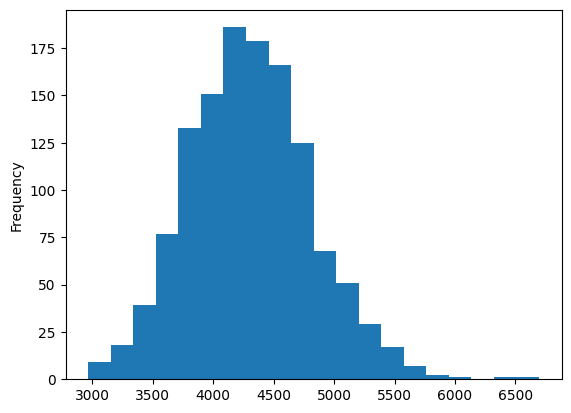

In [31]:
microbes.sum(axis=0).plot.hist(bins=20)
metabolites.shape

In [26]:
plt.show()

In [27]:
plt.savefig('./figures/microbe_dist.png')

<Figure size 640x480 with 0 Axes>

In [36]:
print(f"Microbe shape: {microbes.shape}")
print(f"Metabolite shape: {metabolites.shape}")

Microbe shape: (200, 1260)
Metabolite shape: (10, 1260)


In [37]:
microbes.to_csv('./data/microbes_normalized.tsv', sep='\t', index=True)
metabolites.to_csv('./data/metabolites_normalized.tsv', sep='\t', index=True)

In [5]:
! python ../../src/correlation_test.py

100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 87.53it/s]
pvalues mean: 0.5837407854902444, pvalues std: 0.2366254367542727


In [20]:
! python ../../src/DML.py

100%|█████████████████████████████████████████████| 5/5 [00:50<00:00, 10.05s/it]
pvalues mean: 0.12369975236931638, pvalues std: 0.233261691620734


In [48]:
for microbe in microbes.index:
    for metabolite in metabolites.index:
        rho, p_value = stats.spearmanr(microbes.loc[microbe], metabolites.loc[metabolite])
        print(microbe, metabolite, f"rho: {rho}")


theta_p_0 P_0 rho: -0.013276641819274564
theta_p_0 SA_0 rho: -0.017022363523223026
theta_p_0 F_0 rho: 0.012703947803325018
theta_p_0 SG_0 rho: -0.0020827098334936555
theta_p_0 I_0 rho: 0.02396867467450798
theta_f_0 P_0 rho: 0.03435549577620519
theta_f_0 SA_0 rho: -0.001775183831414621
theta_f_0 F_0 rho: 0.02136970661353285
theta_f_0 SG_0 rho: -0.00926187250461525
theta_f_0 I_0 rho: 0.029162898491679714


In [17]:
# print([(i, j) for j in range(10) for i in range(10)])

In [33]:
! python ../../src/DML_parallel.py

theta_f_10, I_1
theta_f_14, I_1
theta_f_1, I_1
theta_f_11, I_1
theta_f_15, I_1
theta_f_0, I_1
theta_f_12, I_1
theta_f_13, I_1
theta_f_16, I_1
theta_f_17, I_1
theta_f_18, I_1
theta_f_19, I_1
theta_f_2, I_1
theta_f_20, I_1
theta_f_21, I_1
theta_f_22, I_1
theta_f_23, I_1
theta_f_24, I_1
theta_f_25, I_1
theta_f_26, I_1
theta_f_27, I_1
theta_f_28, I_1
theta_f_29, I_1
theta_f_3, I_1
theta_f_30, I_1
theta_f_31, I_1
theta_f_32, I_1
theta_f_33, I_1
theta_f_34, I_1
theta_f_35, I_1
theta_f_36, I_1
theta_f_37, I_1
theta_f_38, I_1
theta_f_39, I_1
theta_f_4, I_1
theta_f_40, I_1
theta_f_41, I_1
theta_f_42, I_1
theta_f_43, I_1
theta_f_44, I_1
theta_f_45, I_1
theta_f_46, I_1
theta_f_47, I_1
theta_f_48, I_1
theta_f_49, I_1
theta_f_5, I_1
theta_f_50, I_1
theta_f_51, I_1
theta_f_52, I_1
theta_f_53, I_1
theta_f_54, I_1
theta_f_55, I_1
theta_f_56, I_1
theta_f_57, I_1
theta_f_58, I_1
theta_f_59, I_1
theta_f_6, I_1
theta_f_60, I_1
theta_f_61, I_1
theta_f_62, I_1
theta_f_63, I_1
theta_f_64, I_1
theta_f_65, I_1

In [ ]:
! python ../../src/DML_parallel.py